In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [28]:
df = pd.read_csv("/Users/joshsteinbecker/jts_project/Data/AminoAcid_Data.csv")
df.columns

Index(['letter', 'three letter code', 'full name', 'R', 'Rank', 'mass: gly',
       'composition', 'average mass', 'c', 'h', 'n', 'basic', 'Hydrophobic',
       'Polar'],
      dtype='object')

In [30]:
df['nlen'] = [len(x) for x in df['full name']]
mass = df['average mass']


In [32]:
xyline = np.linspace(min(df.nlen),max(df.nlen),int(max(mass)))

## Section: Meaningless Correlations
With the provided dataset, draw a correlation that has no use or causal relationships with each other.

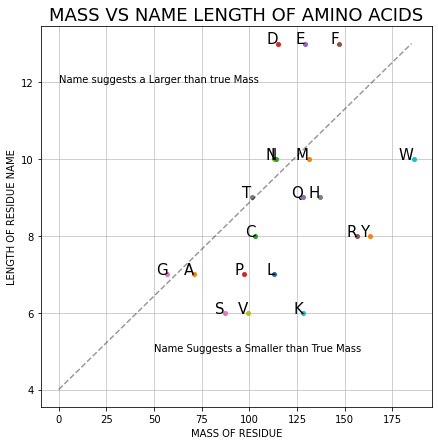

In [33]:
plt.figure(figsize=(7,7))
plt.grid(linewidth = 0.6)
# plt.scatter(mass,nlen, c=df["letter"])
groups = df.groupby("letter")
for name, group in groups:
    plt.plot(group["average mass"],group["nlen"], marker="o", linestyle="", label=name,markersize=4)
    plt.annotate(name,(group["average mass"],group["nlen"]),fontsize=15,ha='right')
# for x,y in zip(df["average mass"],df["nlen"]):
#    label = f'{df["letter"]}'
#    plt.annotate(label,(df['average mass'],df['nlen']))
#plt.legend()
plt.plot(xyline,linestyle='--',color='black',alpha=0.4)
plt.xlabel('MASS OF RESIDUE')
plt.ylabel('LENGTH OF RESIDUE NAME')
plt.annotate('Name Suggests a Smaller than True Mass',(50,5))
plt.annotate('Name suggests a Larger than true Mass',(0,12))
plt.title('MASS VS NAME LENGTH OF AMINO ACIDS',fontsize=18)
plt.show()

In [34]:
df['nitr'] = df['composition'].str.findall('N\d*\d*')
df['oxy'] = df['composition'].str.findall('O\d*\d*')
df['carb'] = df['composition'].str.findall('C\d*\d*')
df['sulp'] = df['composition'].str.findall('S\d*\d*')
df

,letter,three letter code,full name,R,Rank,mass: gly,composition,average mass,c,h,n,basic,Hydrophobic,Polar,nlen,nitr,oxy,carb,sulp
0,W,Trp,Tryptophan,NaN,1 (rank),3.3x Gly,C11H10N2O,186.21,C11,H1,N2,NaN,HP,NaN,10,[N2],[O],[C11],[]
1,Y,Tyr,Tyrosine,-Ph-OH,2 (rank),2.9x Gly,C9H9NO2,163.17,C9,H9,NaN,NaN,NaN,P,8,[N],[O2],[C9],[]
2,R,Arg,Arginine,NaN,3 (rank),2.7x Gly,C6H12N4O,156.19,C6,H1,N4,B,NaN,NaN,8,[N4],[O],[C6],[]
3,F,Phe,Phenylalanine,NaN,4 (rank),2.6x Gly,C9H9NO,147.18,C9,H9,NaN,NaN,HP,NaN,13,[N],[O],[C9],[]
4,H,His,Histidine,NaN,5 (rank),2.4x Gly,C6H7N3O,137.14,C6,H7,N3,B,NaN,NaN,9,[N3],[O],[C6],[]
5,M,Met,Methionine,NaN,6 (rank),2.3x Gly,C5H9NOS,131.20,C5,H9,NaN,NaN,HP,NaN,10,[N],[O],[C5],[S]
6,E,Glu,Glutamic Acid,NaN,7 (rank),2.3x Gly,C5H7NO3,129.12,C5,H7,NaN,A,NaN,NaN,13,[N],[O3],[C5],[]
7,K,Lys,Lysine,NaN,8 (rank),2.2x Gly,C6H12N2O,128.17,C6,H1,N2,B,NaN,NaN,6,[N2],[O],[C6],[]
8,Q,Gln,Glutamine,NaN,9 (rank),2.2x Gly,C5H8N2O2,128.13,C5,H8,N2,NaN,NaN,NaN,9,[N2],[O2],[C5],[]
9,D,Asp,Aspartic Acid,NaN,10 (rank),2.0x Gly,C4H5NO3,115.09,C4,H5,NaN,A,NaN,NaN,13,[N],[O3],[C4],[]


Text(0.5, 1.0, 'AMINO ACIDS BY MASS')

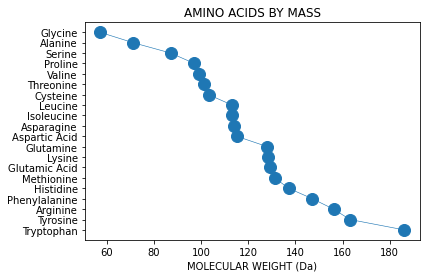

In [ ]:



























































































plt.plot(df['average mass'],df['full name'],marker = 'o',markersize = 12,linewidth=0.6)
plt.xlabel("MOLECULAR WEIGHT (Da)")
plt.title("AMINO ACIDS BY MASS")